## Install Library

In [ ]:
!pip install pillow numpy tensorflow opencv-python matplotlib

# Import Data and Library


In [ ]:
from PIL import Image
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import io
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array

from google.colab import files

In [ ]:
# Function load data from image
def load_image(path):
  image = []
  for filename in os.listdir(path):
    img = Image.open(os.path.join(path, filename))
    img = img.resize((244, 244))
    img = img.convert('RGB')
    img = np.array(img) / 255.0
    image.append(img)

  return image

In [ ]:
glioma_images = load_image('/content/drive/MyDrive/Colab_Notebooks/tumor_dataset/glioma')
meningioma_images = load_image('/content/drive/MyDrive/Colab_Notebooks/tumor_dataset/meningioma')
pituitary_images = load_image('/content/drive/MyDrive/Colab_Notebooks/tumor_dataset/pituitary')
notumor_images = load_image('/content/drive/MyDrive/Colab_Notebooks/tumor_dataset/notumor')

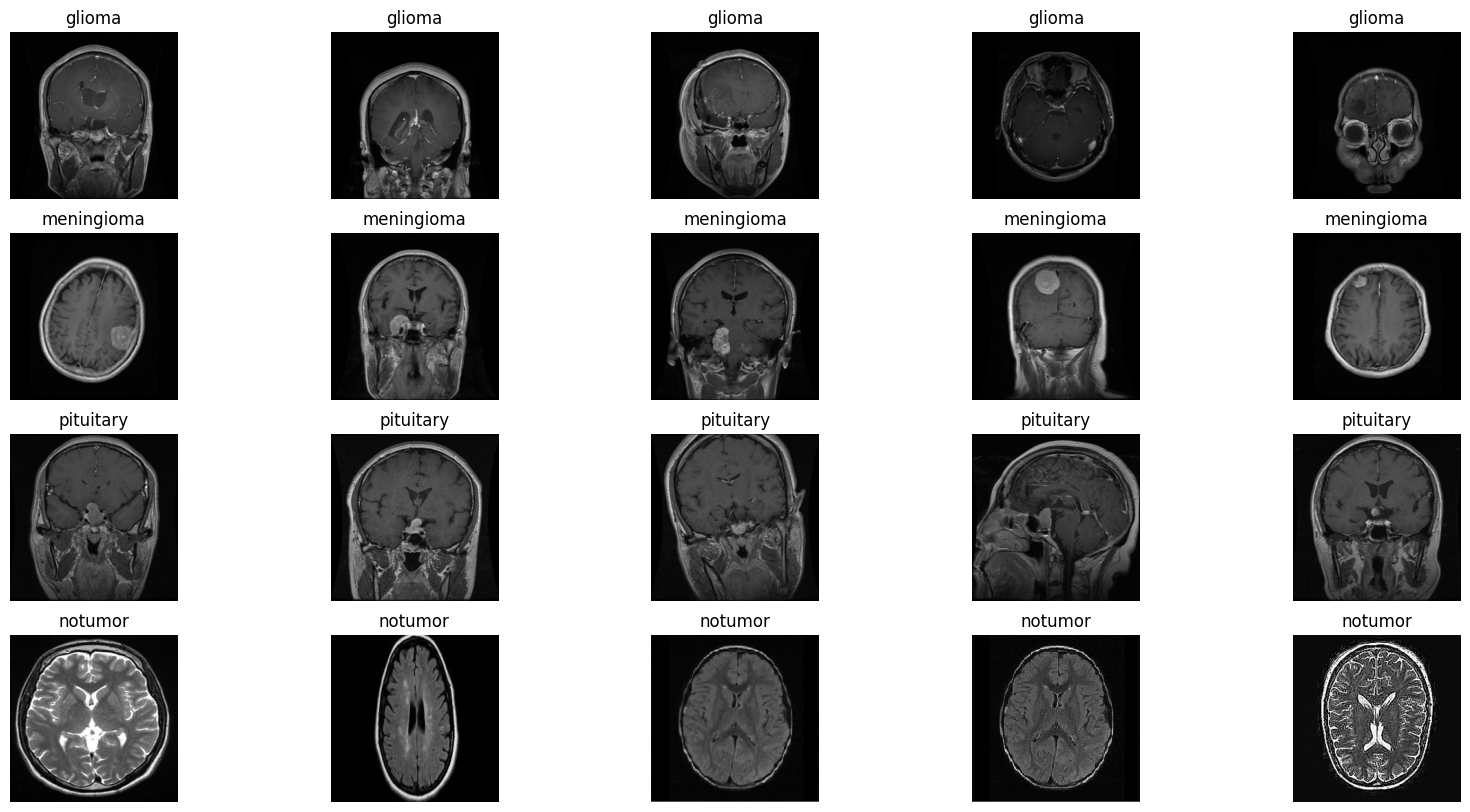

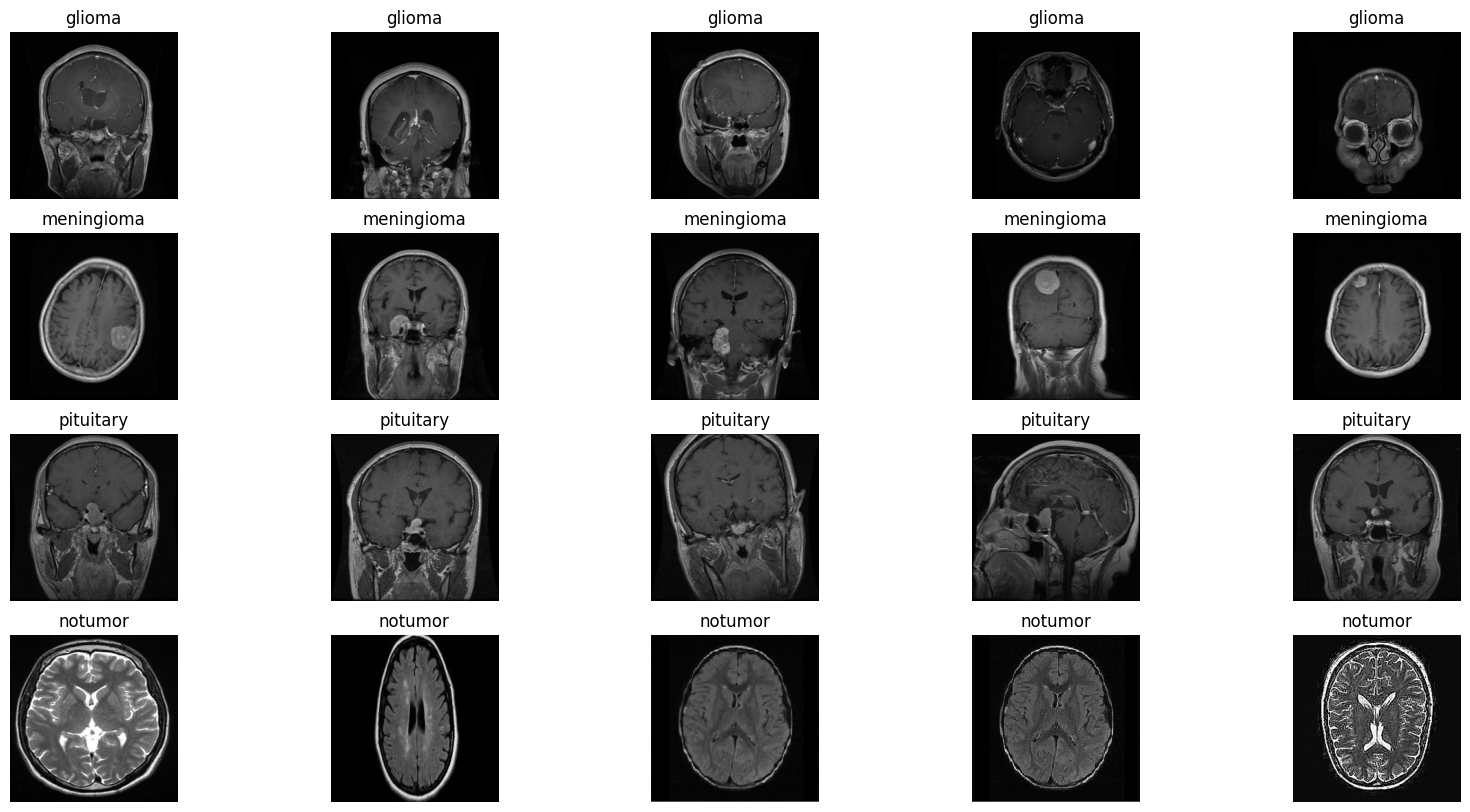

In [ ]:
fig, axes = plt.subplots(4, 5, figsize=(20, 10))

for i in range(5):
  axes[0, i].imshow(glioma_images[i])
  axes[0, i].set_title('glioma')
  axes[0, i].axis('off')

  axes[1, i].imshow(meningioma_images[i])
  axes[1, i].set_title('meningioma')
  axes[1, i].axis('off')

  axes[2, i].imshow(pituitary_images[i])
  axes[2, i].set_title('pituitary')
  axes[2, i].axis('off')

  axes[3, i].imshow(notumor_images[i])
  axes[3, i].set_title('notumor')
  axes[3, i].axis('off')

plt.show()

In [ ]:
type(glioma_images), type(meningioma_images), type(pituitary_images), type(notumor_images)

(list, list, list, list)

(list, list, list, list)

In [ ]:
len(glioma_images), len(meningioma_images), len(pituitary_images), len(notumor_images)

(1621, 1645, 1757, 2000)

(1621, 1645, 1757, 2000)

## Labeling

In [ ]:
def labeling (glioma_images, meningioma_images, pituitary_images, notumor_images):
  glioma_label = np.zeros(len(glioma_images))
  meningioma_label = np.ones(len(meningioma_images))
  pituitary_label = np.full(len(pituitary_images), 2)
  notumor_label = np.full(len(notumor_images), 3)

  return glioma_label, meningioma_label, pituitary_label, notumor_label

glioma_label, meningioma_label, pituitary_label, notumor_label = labeling(glioma_images, meningioma_images, pituitary_images, notumor_images)

In [ ]:
glioma_label

array([0., 0., 0., ..., 0., 0., 0.])

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
meningioma_label

array([1., 1., 1., ..., 1., 1., 1.])

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
pituitary_label

array([2, 2, 2, ..., 2, 2, 2])

array([2, 2, 2, ..., 2, 2, 2])

In [ ]:
notumor_label

array([3, 3, 3, ..., 3, 3, 3])

array([3, 3, 3, ..., 3, 3, 3])

In [ ]:
type(glioma_label), type(meningioma_label), type(pituitary_label), type(notumor_label)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [ ]:
dataset = glioma_images + meningioma_images + pituitary_images + notumor_images
labels = np.concatenate((glioma_label, meningioma_label, pituitary_label, notumor_label), axis=0)

In [ ]:
labels

array([0., 0., 0., ..., 3., 3., 3.])

array([0., 0., 0., ..., 3., 3., 3.])

In [ ]:
dataset[0].shape

(244, 244, 3)

(244, 244, 3)

## Splitting Data

In [ ]:
var_x = np.array(dataset)
var_y = np.array(labels)

In [ ]:
from sklearn.model_selection import train_test_split
var_x_train, var_x_test, var_y_train, var_y_test = train_test_split(var_x, var_y, test_size=0.25, random_state=42)

In [ ]:
train = tf.data.Dataset.from_tensor_slices((var_x_train, var_y_train))
test = tf.data.Dataset.from_tensor_slices((var_x_test, var_y_test))

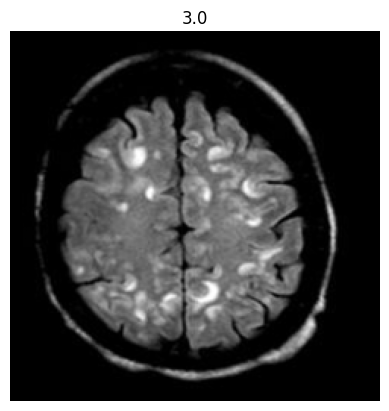

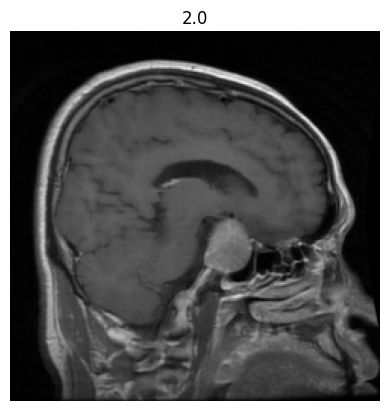

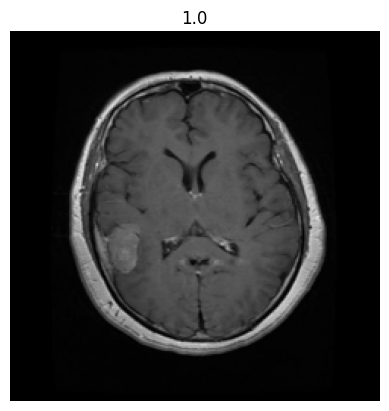

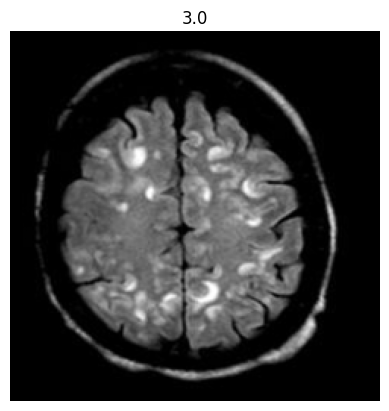

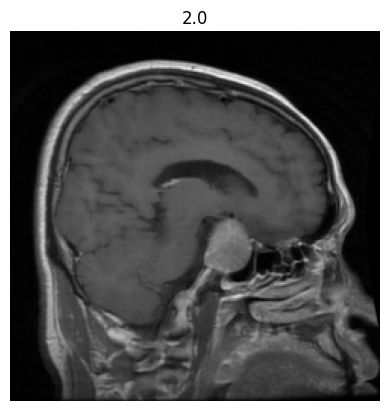

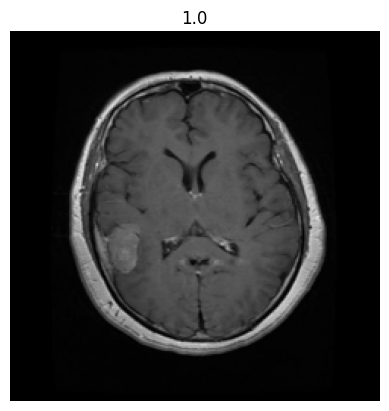

In [ ]:
for image, label in train.take(3):
  plt.figure()
  plt.imshow(image)
  plt.title(label.numpy())
  plt.axis('off')
  plt.show()

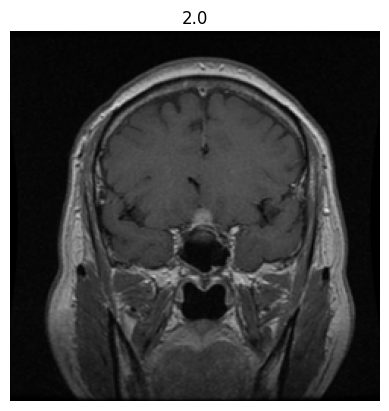

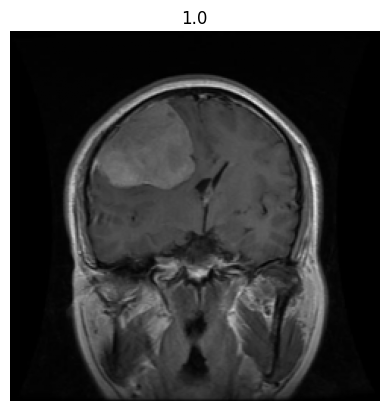

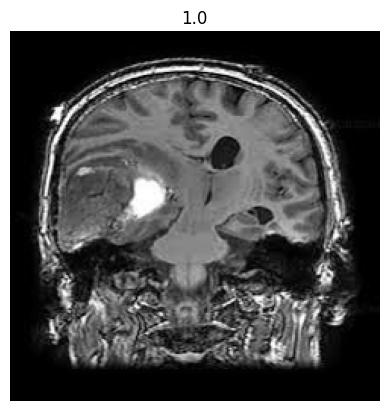

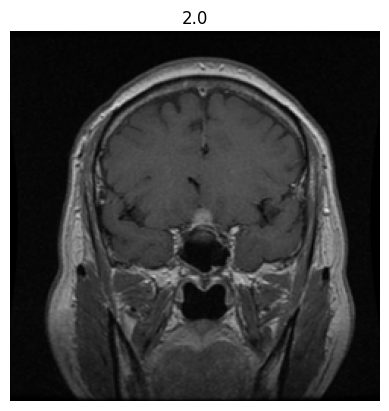

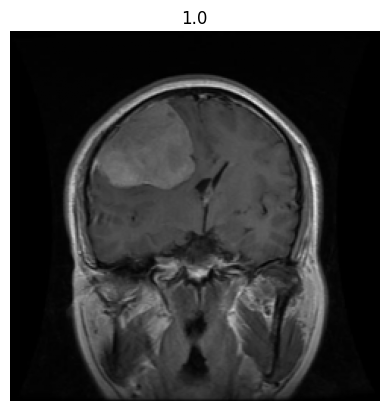

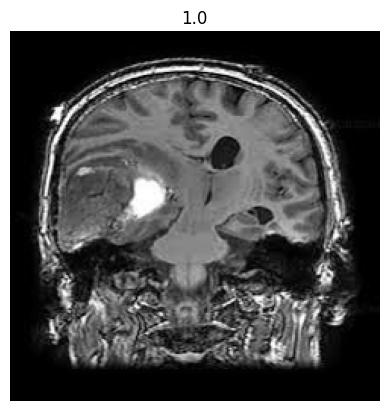

In [ ]:
for image, label in test.take(3):
  plt.figure()
  plt.imshow(image)
  plt.title(label.numpy())
  plt.axis('off')
  plt.show()

In [ ]:
validation_size = int(0.1 * len(var_x_train))
train = train.skip(validation_size)
validation = train.take(validation_size)

In [ ]:
len(train), len(validation), len(test)

(4741, 526, 1756)

(4741, 526, 1756)

In [ ]:
BATCH_SIZE = 256
train = train.batch(BATCH_SIZE)
validation = validation.batch(BATCH_SIZE)
test = test.batch(BATCH_SIZE)

## Training Data

In [ ]:
model = Sequential()

# CNN
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(244, 244, 3), padding='valid'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 242, 242, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 121, 121, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 119, 119, 64)      18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 59, 59, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 57, 57, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 28, 28, 128)      

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train, epochs=10, validation_data=validation, verbose=1)

Epoch 1/10
19/19 [==============================] - 468s 25s/step - loss: 1.3978 - accuracy: 0.4655 - val_loss: 0.7637 - val_accuracy: 0.6749
Epoch 2/10
19/19 [==============================] - 462s 24s/step - loss: 0.6952 - accuracy: 0.7214 - val_loss: 0.4831 - val_accuracy: 0.7985
Epoch 3/10
19/19 [==============================] - 463s 24s/step - loss: 0.4731 - accuracy: 0.8142 - val_loss: 0.3421 - val_accuracy: 0.8707
Epoch 4/10
19/19 [==============================] - 463s 24s/step - loss: 0.3696 - accuracy: 0.8610 - val_loss: 0.2880 - val_accuracy: 0.8745
Epoch 5/10
19/19 [==============================] - 462s 24s/step - loss: 0.3078 - accuracy: 0.8823 - val_loss: 0.2095 - val_accuracy: 0.9297
Epoch 6/10
19/19 [==============================] - 463s 24s/step - loss: 0.2604 - accuracy: 0.8988 - val_loss: 0.1913 - val_accuracy: 0.9221
Epoch 7/10
19/19 [==============================] - 462s 24s/step - loss: 0.2043 - accuracy: 0.9268 - val_loss: 0.1262 - val_accuracy: 0.9525
Epoch 

In [ ]:
evaluation = model.evaluate(test)

7/7 [==============================] - 49s 7s/step - loss: 0.2059 - accuracy: 0.9368


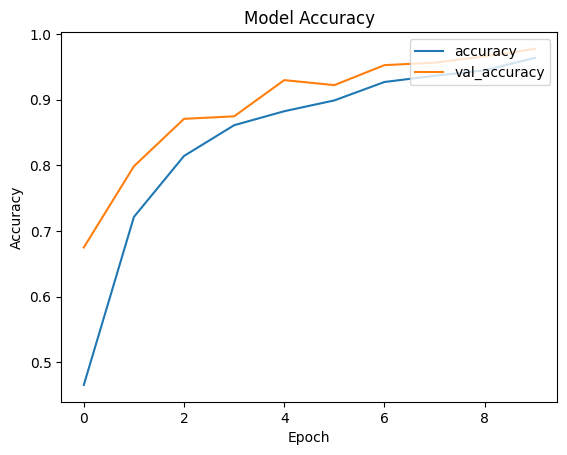

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'], loc='upper right')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

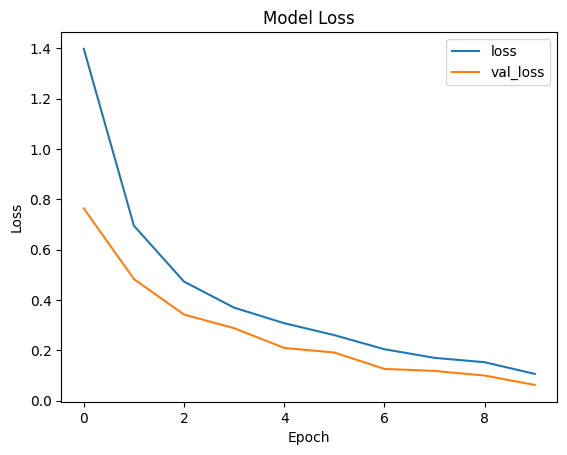

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

## Export Model

In [ ]:
model.save("/content/drive/MyDrive/Colab_Notebooks/BrainTumorDetection_CNN/brain_tumorV2.h5")

## Testing

In [ ]:
THRESHOLD = 0.9

def load_uploaded_image(image_bytes):
    img = Image.open(io.BytesIO(image_bytes))
    img = img.resize((244, 244))
    img_array = img.convert('RGB')
    img_array = np.array(img) / 255.0
    return img_array

def predict_image(image_bytes):
    img_array = load_uploaded_image(image_bytes)
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    class_names = ['glioma detected', 'meningioma detected', 'pituitary detected', 'no tumor detected']
    probability = np.max(prediction)
    if probability < THRESHOLD:
        return "Not a Brain X-Ray", probability

    predicted_class = class_names[np.argmax(prediction)]
    return predicted_class, probability

Saving Te-no_0025.jpg to Te-no_0025 (5).jpg


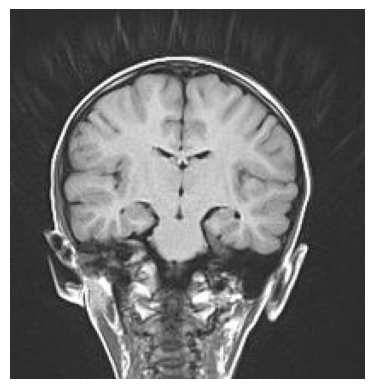

1/1 [==============================] - 0s 61ms/step
Predicted Class: no tumor
Probability: 0.9710627198219299


In [ ]:
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
image_bytes = uploaded[file_name]
img = Image.open(io.BytesIO(image_bytes))

plt.imshow(img)
plt.axis('off')
plt.show()

# Get prediction and probability
predicted_class, probability = predict_image(image_bytes)
print(f"Predicted Class: {predicted_class}")
print(f"Probability: {probability}")